In [1]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt   # For visualization

sns.set(style='ticks', context='talk')
na_values = ['NO CLUE', 'N/A', '0']

In [2]:
ytdspam_psy = pd.read_csv('C:\\Users\\hp\\Downloads\\spamornot\\Youtube01-Psy.csv')
ytdspam_kattyparry = pd.read_csv('C:\\Users\\hp\\Downloads\\spamornot\\Youtube02-KatyPerry.csv')
ytdspam_LMFAO = pd.read_csv('C:\\Users\\hp\\Downloads\\spamornot\\Youtube03-LMFAO.csv')
ytdspam_Emnm = pd.read_csv('C:\\Users\\hp\\Downloads\\spamornot\\Youtube04-Eminem.csv')

In [3]:

ytd_data = pd.concat([ytdspam_psy,ytdspam_kattyparry,ytdspam_LMFAO,ytdspam_Emnm])

In [4]:

ytd_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:

ytd_data.loc[:,'CONTENT':'CLASS'].head(100)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
95,Plizz withing my channel ﻿,1
96,I made a gaming channel (Unique right?) :L Ang...,1
97,Please help me go here http://www.gofundme.com...,1
98,Anybody who subscribes to me will get 10 subsc...,1


In [6]:
SpmMatch = ["check my video", "Follow me", "watch my videos","subscribe","Please share","Check out","my channel","my page",
            "giftcard","promos","sex","channel","new track","ATTENTION","HTTP","subs","check","like them","new album","Hack",
            "VOTE","please listen","join me","help me","help","youtube","gay","share","fuck","make money","visit","Donate",
            "trailer","free","channel","instagram","facebook","soundcloud","support","website"]

In [7]:

# Count the number of spam words in the comment using the spam dictionary
ytd_data['SPM_CNT'] = ytd_data['CONTENT'].str.upper().str.count(str.upper("|".join(SpmMatch)))
print(ytd_data['SPM_CNT'])

0      2
1      3
2      0
3      2
4      1
      ..
443    2
444    1
445    1
446    0
447    0
Name: SPM_CNT, Length: 1586, dtype: int64


In [8]:
stop_words = [ "a","i","me","my","we","our","for", "ours","ourselves", "you", "your","yourself","yourselves", "he","him", "his", "himself","her","hers", "herself","it", "its", "itself","them","their", "theirs","themselves", "what", "which","whom","this", "that","these", "those", "am","are","was", "were","be", "been", "being","has","had", "having","do", "does", "did","would","should", "could","ought", "i'm", "you're","she's","it's", "we're","they're", "i've", "you've","they've","i'd", "you'd","he'd", "she'd", "we'd","i'll","you'll", "he'll","she'll", "we'll", "they'll","aren't","wasn't", "weren't","hasn't", "haven't", "hadn't","don't","didn't", "won't","wouldn't", "shan't", "shouldn't","cannot","couldn't", "mustn't","let's", "that's", "who's","here's","there's", "when's","where's", "why's", "how's","an","the", "and","but", "if", "or","as","until", "while","of", "at", "by","with","about", "against","between", "into", "through","before","after", "above","below", "to", "from","down","in", "out","on", "off", "over","again","further", "then","once", "here", "there","where","why", "how","all", "any", "both","few","more", "most","other", "some", "such","nor","not", "only","own", "same", "so","too","very"]

In [9]:

ytd_data['IS_URL'] = ytd_data['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))

<AxesSubplot:xlabel='CLASS', ylabel='IS_URL'>

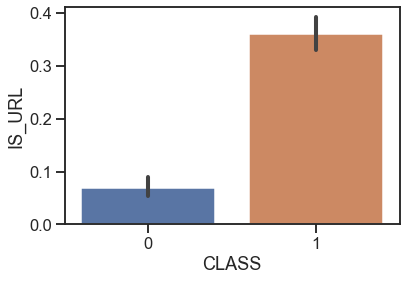

In [10]:
sns.barplot(x='CLASS', y='IS_URL', data=ytd_data) 